In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

In [2]:
store_DF = pd.read_csv('../Data/Wholesale_Data.csv')

In [3]:
store_DF

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
store_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
column_list = store_DF.columns

for column in column_list:
    print('==============================')
    print(column)
    print(store_DF[column].unique())
    print('==============================')

Channel
[2 1]
Region
[3 1 2]
Fresh
[ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  12212  11170  36050  76237  19219  21465    140  42312
   7149   2101  14903   9434   7388   6300

After some initial EDA, the Channel and Region columns are clearly categorical. Their data types will be switched for now, but the columns will be dropped altogether before being exported for use in the models.

In [7]:
store_DF['Channel'] = store_DF['Channel'].astype('category')
store_DF['Region'] = store_DF['Region'].astype('category')

In [8]:
store_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


#### EDA Visualizations

Below are a series of barcharts displaying the relationship between the various store item categories, the region of the store, and the channel that the goods were sold via. 

<Axes: xlabel='Region', ylabel='Fresh'>

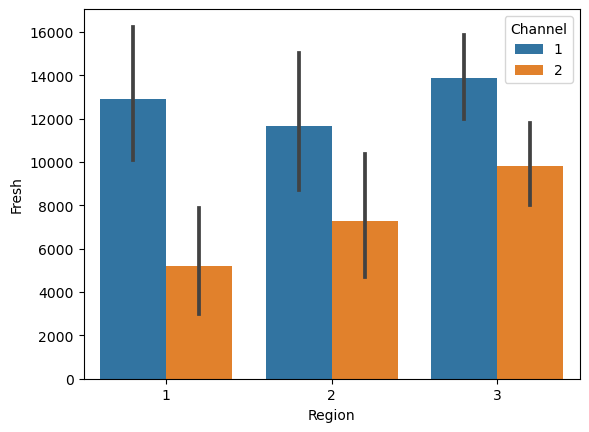

In [9]:
sns.barplot(data=store_DF, x='Region', y='Fresh', hue = 'Channel')

<Axes: xlabel='Region', ylabel='Milk'>

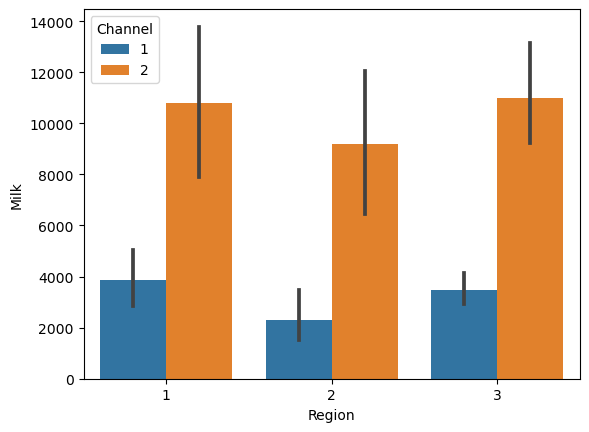

In [10]:
sns.barplot(data=store_DF, x='Region', y='Milk', hue = 'Channel')

<Axes: xlabel='Region', ylabel='Grocery'>

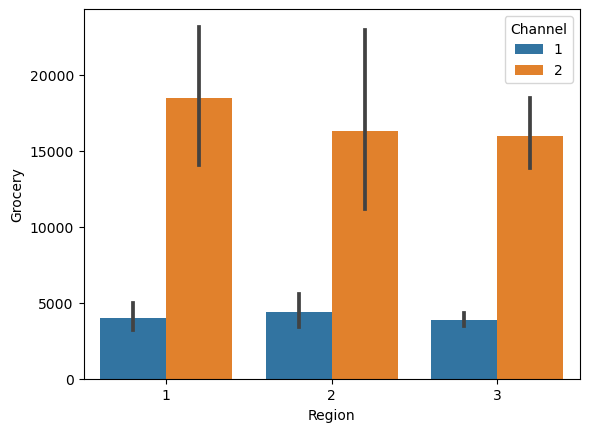

In [11]:
sns.barplot(data=store_DF, x='Region', y='Grocery', hue = 'Channel')

<Axes: xlabel='Region', ylabel='Frozen'>

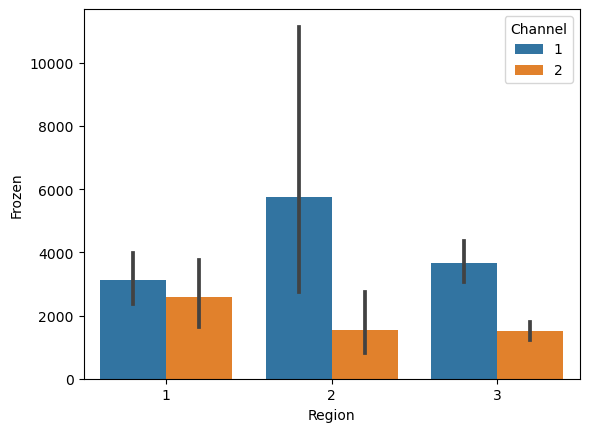

In [12]:
sns.barplot(data=store_DF, x='Region', y='Frozen', hue = 'Channel')

<Axes: xlabel='Region', ylabel='Detergents_Paper'>

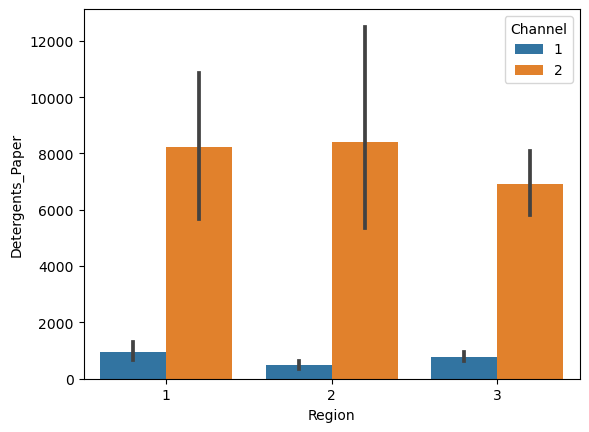

In [13]:
sns.barplot(data=store_DF, x='Region', y='Detergents_Paper', hue = 'Channel')

<Axes: xlabel='Region', ylabel='Delicassen'>

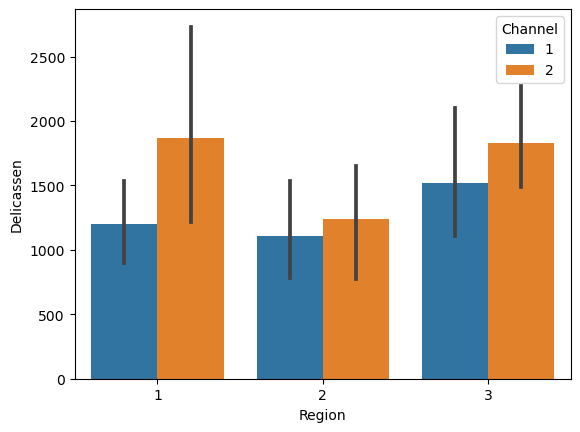

In [14]:
sns.barplot(data=store_DF, x='Region', y='Delicassen', hue = 'Channel')

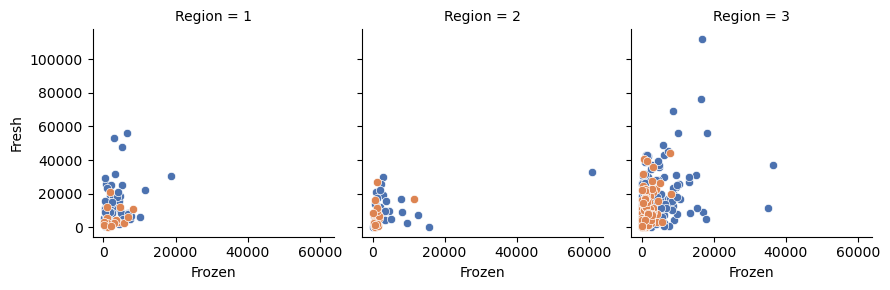

In [15]:
grid_graphs = sns.FacetGrid(store_DF, col = 'Region', row_order = column_list, hue = 'Channel', palette = 'deep')
grid_graphs.map(sns.scatterplot, 'Frozen', 'Fresh')

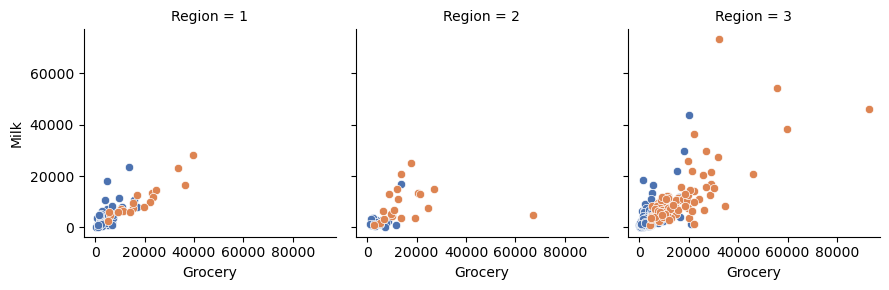

In [16]:
grid_graphs = sns.FacetGrid(store_DF, col = 'Region', row_order = column_list, hue = 'Channel', palette = 'deep')
grid_graphs.map(sns.scatterplot, 'Grocery', 'Milk')

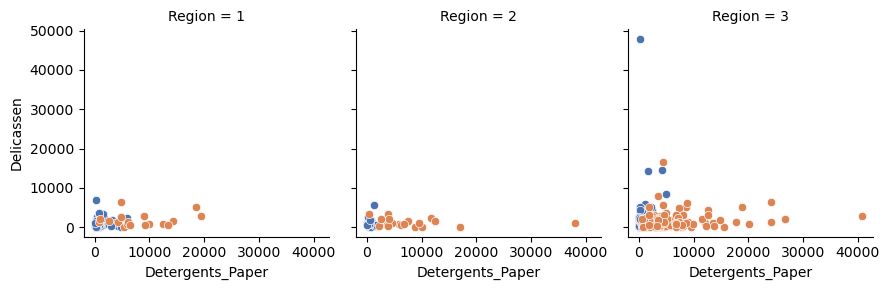

In [17]:
grid_graphs = sns.FacetGrid(store_DF, col = 'Region', row_order = column_list, hue = 'Channel', palette = 'deep')
grid_graphs.map(sns.scatterplot, 'Detergents_Paper', 'Delicassen')

#### Data is exported for use in the 3 unsupervised models.

In [18]:
export_DF = store_DF.drop(['Region', 'Channel'], axis = 1)

In [19]:
export_DF.to_csv('../Data/Model_Data.csv')